In [1]:
import sys
import os
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np

from src.models import helpers
from src.models.model import Model
from src.models.loops import test_loop
from src.models.municipalities import MUNICIPALITIES

# appending model path for pickle
sys.path.append('src/models')

In [2]:
# MODEL
NAME = "sun_temperature"
MODEL_PATH = f"models/{NAME}/"

In [4]:
model_dict = torch.load(MODEL_PATH + "model.pt")

with open(MODEL_PATH + "test.pkl", "rb") as f:
    test_loader = pickle.load(f)

num_features, num_target = helpers.get_num_input_output(test_loader)

input_dicts = []
for xs in num_features:
    input = {
        "NUM_FEATURES": xs,
        "OUTPUT_UNITS": 64,
        "DROPOUT": 0.1,
    }
    input_dicts.append(input)

model = Model(num_target, *input_dicts)
model.load_state_dict(model_dict)


<All keys matched successfully>

In [5]:
loss_fn = torch.nn.MSELoss(reduction="none")
avg_test_error, municipaliy_error = test_loop(test_loader, model, loss_fn)


Test Error: 
 Avg MWh: 0.354902


In [6]:
# get example prediction

print("NOTE: MANY HOURS ARE NIGHT TIME ETC WHICH WILL HAVE VERY SMALL PREDICTIONS. if plots looks weird change example_idx Try again")
*X, y = next(iter(test_loader))
model.eval()
pred = model(*X)

example_idx = 2
single_example_pred = pred[example_idx]
single_example_ground_truth = y[example_idx]

NOTE: MANY HOURS ARE NIGHT TIME ETC WHICH WILL HAVE VERY SMALL PREDICTIONS. if plots looks weird change example_idx Try again


NOTE: MANY HOURS ARE NIGHT TIME ETC WHICH WILL HAVE VERY SMALL PREDICTIONS. if plots looks weird change example_idx Try again


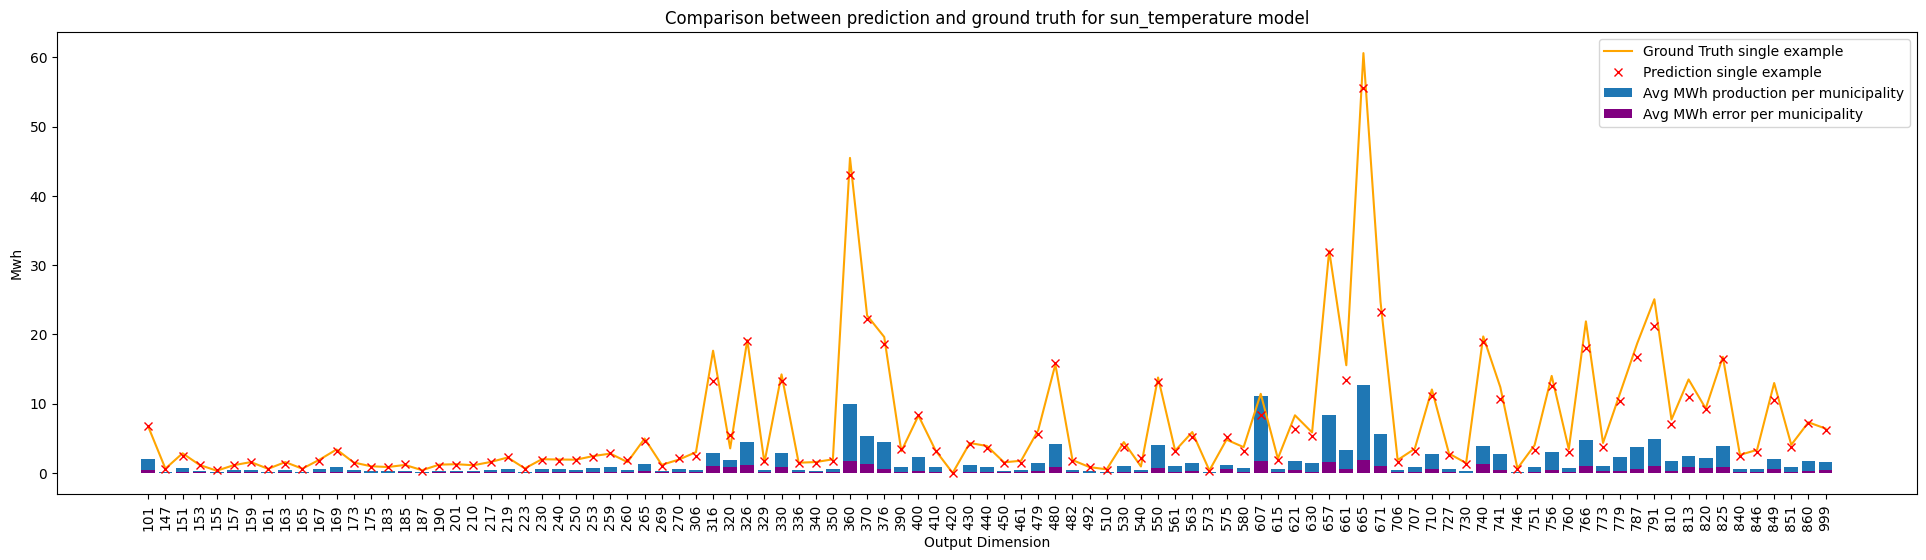

In [7]:
# plot example
plt.figure(figsize=(24, 6))

print("NOTE: MANY HOURS ARE NIGHT TIME ETC WHICH WILL HAVE VERY SMALL PREDICTIONS. if plots looks weird change example_idx Try again")

# Plotting ground truth bars
plt.plot(
    np.arange(len(single_example_ground_truth)),
    single_example_ground_truth,
    label="Ground Truth single example",
    color="orange",
)

plt.xticks(np.arange(len(single_example_ground_truth)), MUNICIPALITIES, rotation=90)
# Plotting prediction markers
plt.plot(
    np.arange(len(single_example_pred)),
    single_example_pred.detach().numpy(),
    "rx",
    label="Prediction single example",
)


plt.bar(
    np.arange(len(single_example_pred)),
    torch.mean(y, dim=0).detach().numpy(),
    label="Avg MWh production per municipality",
)

plt.bar(
    np.arange(len(single_example_pred)),
    municipaliy_error[0],
    label="Avg MWh error per municipality",
    color="purple",
)


plt.xlabel("Output Dimension")
plt.ylabel("Mwh")
plt.title(f"Comparison between prediction and ground truth for {NAME} model")
plt.legend()
plt.show()
